In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.grid'] = True

### Part A: Numerical Simulation of the Harmonic Oscillator ###

In [3]:
#Defining the Euler Richardson algorithm that will operate in our solver function

def EulerRichardson(f, dt, wi, xi, vi):
    halfstep = 0.5*dt
    
    xmid = xi + vi*halfstep
    vmid = vi + f(xi, wi)*halfstep
    amid = f(xmid, wi)
    return vi + amid*dt

In [4]:
#Defining the function used to calculate the acceleration at each step

def accel(x, w0):
    return -x*w0**2

In [5]:
#Solver

def EulerRichardsonSolve(f, dt, w0, x0, v0, tmax, store = False, plotSteps = False, printSteps = False, printPeriod = False, plotSolution = False):
    wi = w0
    xi = x0
    vi = v0
    
    xsteps, vsteps = [], []
    xsteps.append(xi)
    vsteps.append(vi)
    
    t = 0
    while t < tmax:
        vi = EulerRichardson(f, dt, wi, xi, vi)
        xi += vi*dt
        
        
        xsteps.append(xi)
        vsteps.append(vi)
        
        t += dt
    
    if(plotSteps):
        plt.plot(np.linspace(0,tmax, len(xsteps)), xsteps, label='Euler-Richardson Approximation')
        plt.title('Harmonic Motion')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement')
        plt.axhline(y=0, color='k')
        plt.legend(loc='upper right')
    if(printSteps):
        print(xsteps)
    if(printPeriod):
        print("Period = %.2fs" % (2*np.pi/wi))
    if(plotSolution):
        def dU_dt(U, t):
            return [U[1], -U[0]*w0**2]
        U0 = [x0, v0]
        ts = np.linspace(0,tmax, len(xsteps))
        Us = odeint(dU_dt, U0, ts)
        ys = Us[:,0]
        plt.plot(ts,ys, color='red', label='Analytical Solution')
        plt.legend(loc='upper right');
    if(store):
        return np.asarray((np.linspace(0,tmax, len(xsteps)), xsteps, vsteps))

Period = 2.09s


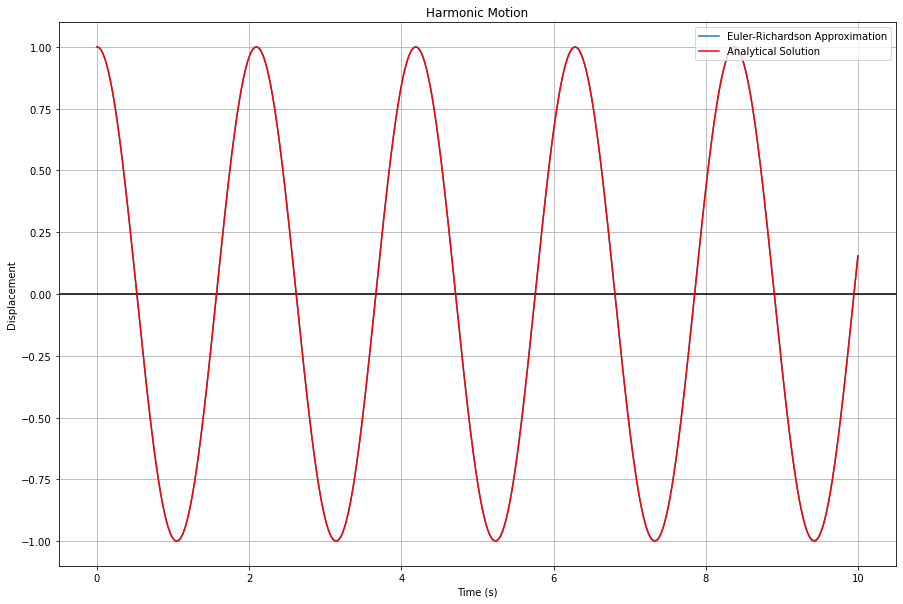

In [72]:
#Testing the Solver

EulerRichardsonSolve(accel, 0.0001, 3, 1, 0, 10, False, True, False, True, True)

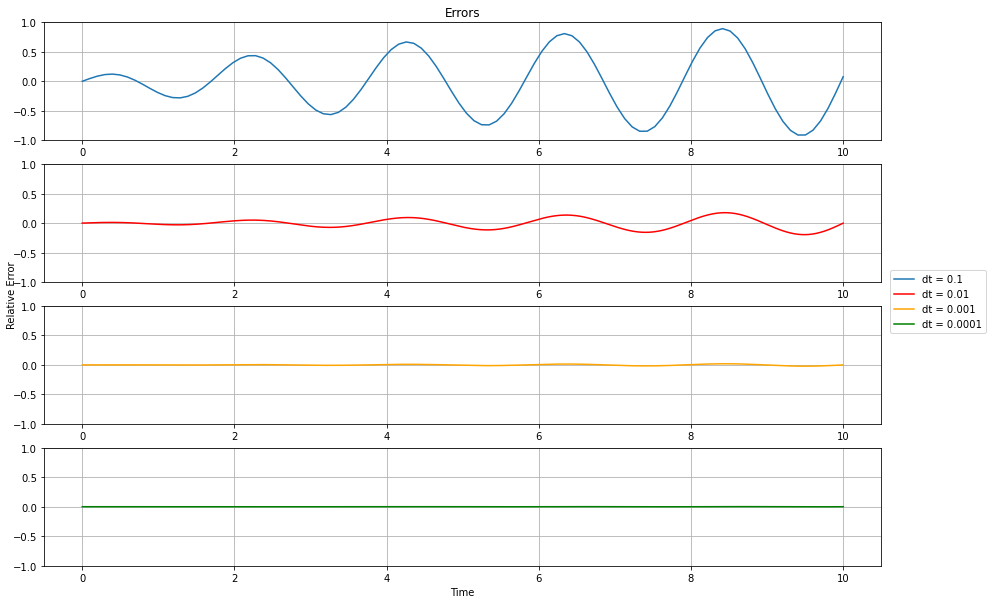

In [7]:
step01 = EulerRichardsonSolve(accel, 0.1, 3, 1, 0, 10, True)
step001 = EulerRichardsonSolve(accel, 0.01, 3, 1, 0, 10, True)
step0001 = EulerRichardsonSolve(accel, 0.001, 3, 1, 0, 10, True)
step00001 = EulerRichardsonSolve(accel, 0.0001, 3, 1, 0, 10, True)

#Plotting the difference between analytical solution and numerical solution to determine ideal step size

def dU_dt(U, t):
    return [U[1], -U[0]*9]
err01 = [odeint(dU_dt, [1, 0], step01[0] )[:,0]]
err001 = [odeint(dU_dt, [1, 0], step001[0] )[:,0]]
err0001 = [odeint(dU_dt, [1, 0], step0001[0] )[:,0]]
err00001 = [odeint(dU_dt, [1, 0], step00001[0] )[:,0]]
fig, ax = plt.subplots(4,1, figsize=(15,10))
ax[0].plot(step01[0], err01[0]-step01[1], label = 'dt = 0.1')
ax[1].plot(step001[0], err001[0]-step001[1], label = 'dt = 0.01', color='red')
ax[2].plot(step0001[0], err0001[0]-step0001[1], label = 'dt = 0.001', color='orange')
ax[3].plot(step00001[0], err00001[0]-step00001[1], label = 'dt = 0.0001', color='green')
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.title('Errors')
plt.xlabel('Time')
plt.ylabel('Relative Error')
plt.figlegend(loc='right')
plt.setp(ax, ylim=(-1,1))
plt.grid(False);

### Part B: Damped Linear Oscillator ###

In [8]:
def DampEulerRichardson(f, dt, wi, xi, vi, g):
    halfstep = 0.5*dt
    
    xmid = xi + vi*halfstep
    vmid = vi + f(xi, vi, g)*halfstep
    amid = f(xmid, vmid, g)
    return vi + amid*dt

In [9]:
def dampaccel(x, v, g):
    return -x*9 - g*v

In [10]:
def DampEulerRichardsonSolve(f, dt, w0, x0, v0, g, tmax, store = False, plotSteps = False, printSteps = False, printPeriod = False, plotSolution = False, printFreq = False):
    wi = w0
    xi = x0
    vi = v0
    newfreq = np.sqrt(w0**2 - (g/2)**2)
    xsteps, vsteps = [], []
    xsteps.append(xi)
    vsteps.append(vi)
    
    t = 0
    while t < tmax:
        vi = DampEulerRichardson(f, dt, wi, xi, vi, g)
        xi += vi*dt
        
        
        xsteps.append(xi)
        vsteps.append(vi)
        
        t += dt

    if(plotSteps):
        plt.plot(np.linspace(0,tmax, len(xsteps)), xsteps, label='Euler-Richardson Approximation')
        plt.title('Harmonic Motion')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement')
        plt.axhline(y=0, color='k')
        plt.legend(loc='upper right');
    if(printSteps):
        print(xsteps)
    if(printPeriod):
        print("Period = %.2fs" % (2*np.pi/w0))
    if(printFreq):
        print("Frequency = %.2fs" % (newfreq))
    if(plotSolution):
        def dU_dt(U, t):
            return [U[1], -g*U[1]-w0**2*U[0]]
        U0 = [x0, v0]
        ts = np.linspace(0,tmax, len(xsteps))
        Us = odeint(dU_dt, U0, ts)
        ys = Us[:,0]
        plt.plot(ts,ys, color='red', label='Analytical Solution')
        plt.legend(loc='upper right');
    if(store):
        return np.asarray((np.linspace(0,tmax, len(xsteps)), xsteps, vsteps))

In [11]:
#Creating arrays that will later be used to plot data

damped05 = DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, 0.5, 10, True)
damped1to3 = [DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, i, 10, True) for i in range(1,4)]

In [12]:
damped1to3 = [DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, i, 10, True) for i in range(1,4)]
reshape = np.reshape(damped05, (1,3,100002))
damped05to3 = np.concatenate((reshape,damped1to3))
damped4to8 = [DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, i, 10, True) for i in range(4,9)]
damped05to8 = np.concatenate((damped05to3, damped4to8))

C:\Users\Niall\3D Objects\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


Period = 2.09s


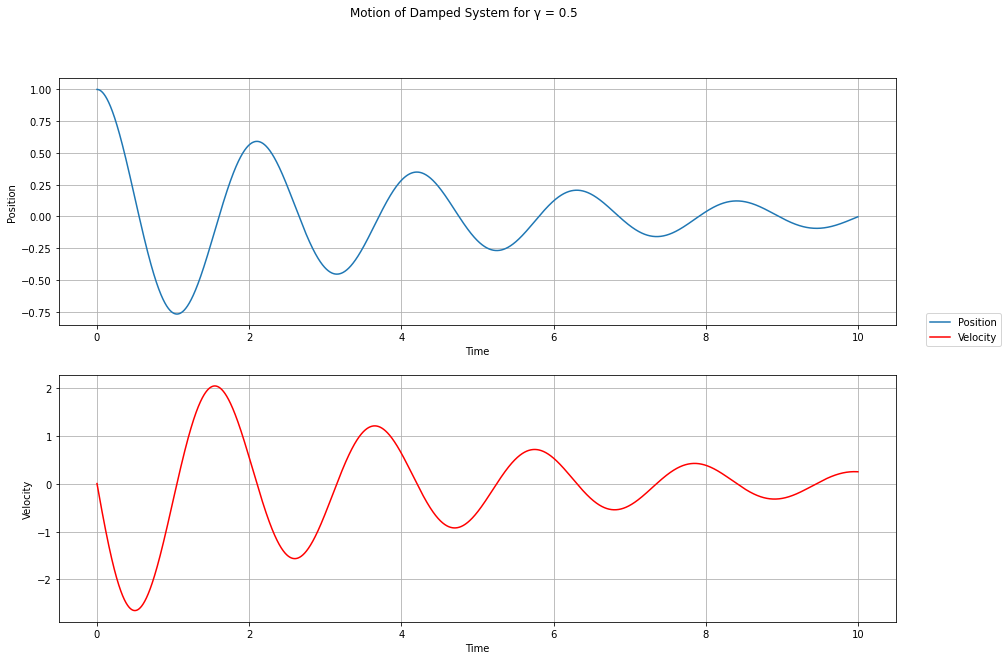

In [13]:
damped05period = DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, 0.5, 10, False, False, False, True, False)
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax[0].plot(damped05to3[0][0], damped05to3[0][1], label='Position')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Position')
ax[1].plot(damped05to3[0][0], damped05to3[0][2], color='r', label='Velocity')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Velocity')
ax[0].grid(True), ax[1].grid(True)
fig.legend(loc='right')
plt.suptitle('Motion of Damped System for \u03B3 = 0.5');

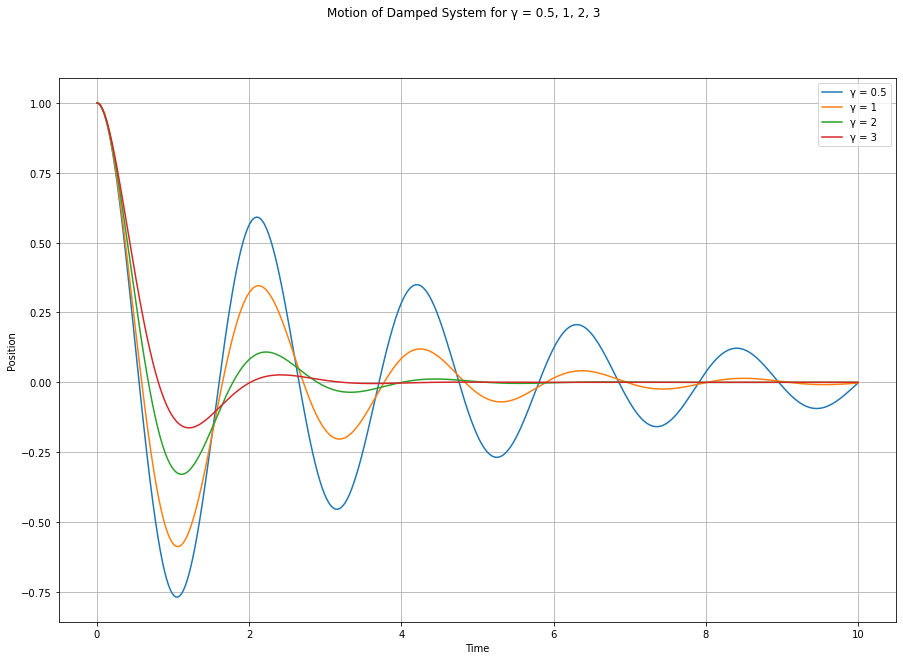

In [14]:
plt.plot(damped05to3[0][0], damped05to3[0][1], label='\u03B3 = 0.5')
for i in range(1,4):
    plt.plot(damped05to3[i][0], damped05to3[i][1], label='\u03B3 = %.0f' % (i))
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.suptitle('Motion of Damped System for \u03B3 = 0.5, 1, 2, 3');

In [15]:
#Defining the function used to calculate the total Energy of the system wrt. time

def energy(w,t,x,v):
    return 0.5 * v**2 + 0.5 * w**2 * x**2

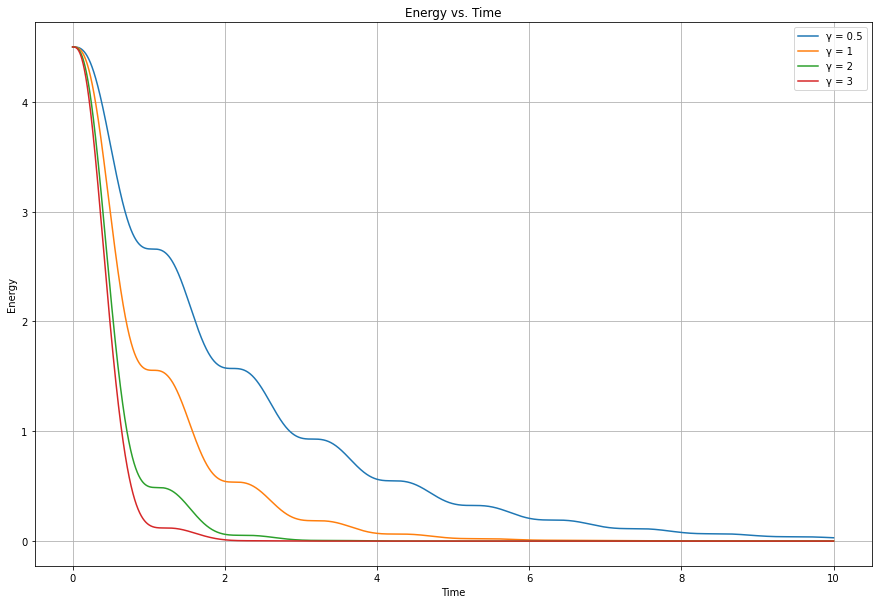

In [16]:
#Plotting Energy vs. Time for different values of the damping constant

energy05to3 = [energy(3, *damped05to3[i]) for i in range(0,4)]

plt.plot(damped05to3[0][0], energy05to3[0], label='\u03B3 = %.1f' % (0.5))
for i in range(1,4):
    plt.plot(damped05to3[i][0], energy05to3[i], label='\u03B3 = %.0f' % (i))
plt.title('Energy vs. Time')
plt.xlabel('Time')
plt.ylabel('Energy')
plt.legend();

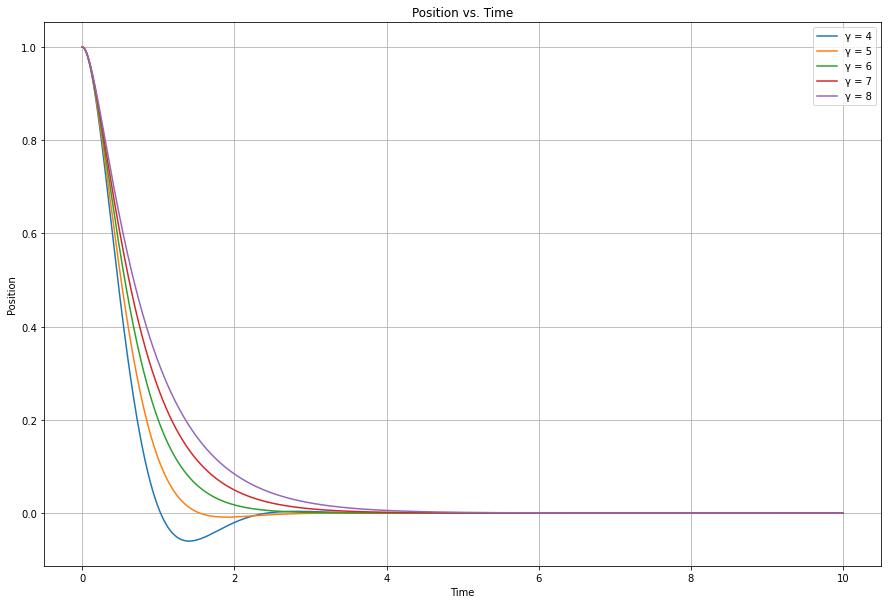

In [17]:
#Plotting Position vs. Time for different values of the damping constant

for i in range(0,5):
    plt.plot(damped4to8[i][0], damped4to8[i][1], label='\u03B3 = %.0f' % (i+4))

plt.title('Position vs. Time')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend();

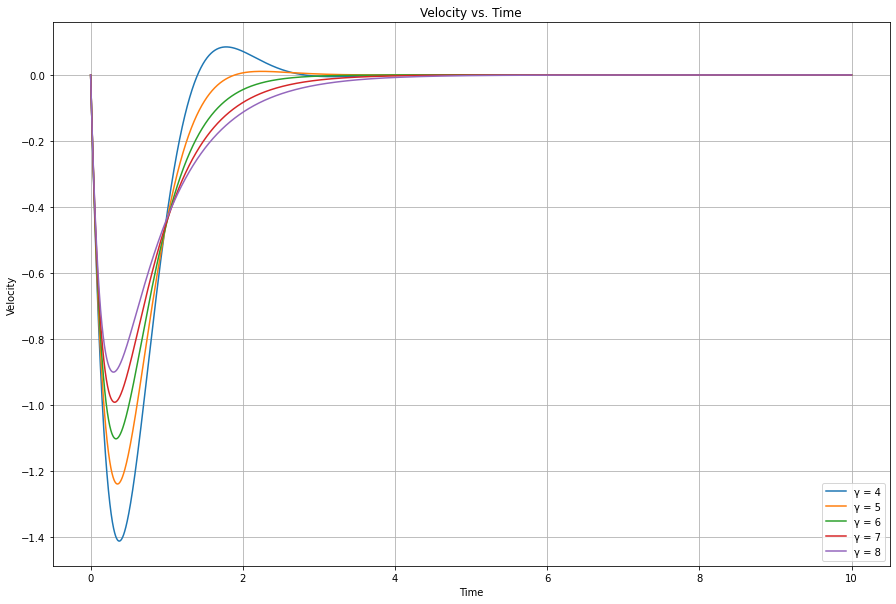

In [18]:
#Plotting Velocity vs. Time for different values of the damping constant

for i in range(0,5):
    plt.plot(damped4to8[i][0], damped4to8[i][2], label='\u03B3 = %.0f' % (i+4))
plt.title('Velocity vs. Time')
plt.xlabel('Time')
plt.ylabel('Velocity')
plt.legend(loc='lower right');

In [19]:
dampedw04 = [DampEulerRichardsonSolve(dampaccel, 0.0001, 4, 1, 0, i, 10, True) for i in range(3,9)]
dampedw02 = [DampEulerRichardsonSolve(dampaccel, 0.0001, 2, 1, 0, i, 10, True) for i in range(3,8)]

C:\Users\Niall\3D Objects\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


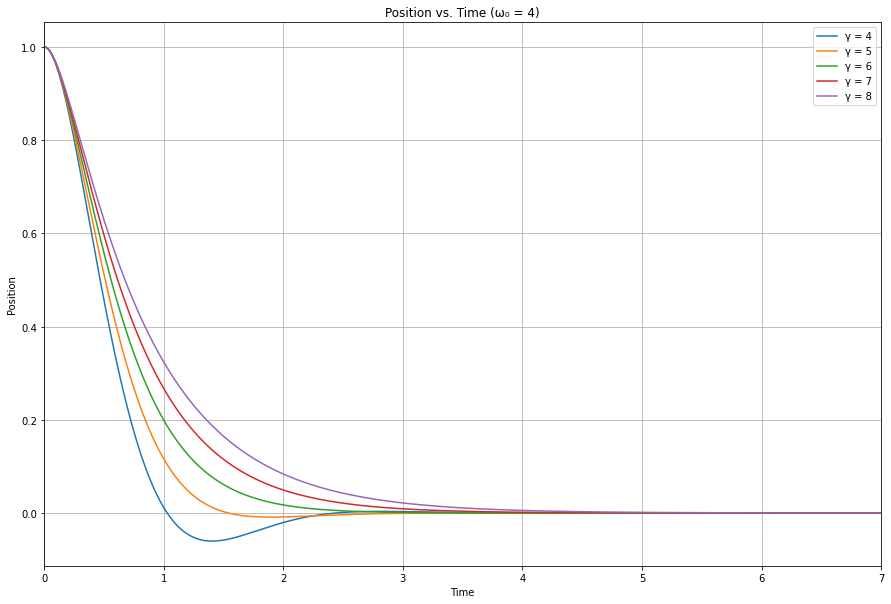

In [20]:
for i in range(1,6):
    plt.plot(dampedw04[i][0], dampedw04[i][1], label='\u03B3 = %.0f' % (i+3))

plt.title('Position vs. Time (\u03C9\u2080 = 4)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xlim((0,7))
plt.legend();

In [21]:
def criticaldamping(w0):
    return (np.sqrt(4*w0**2))

In [22]:
cdamping = [criticaldamping(x) for x in [2,4]]
cdamping

[4.0, 8.0]

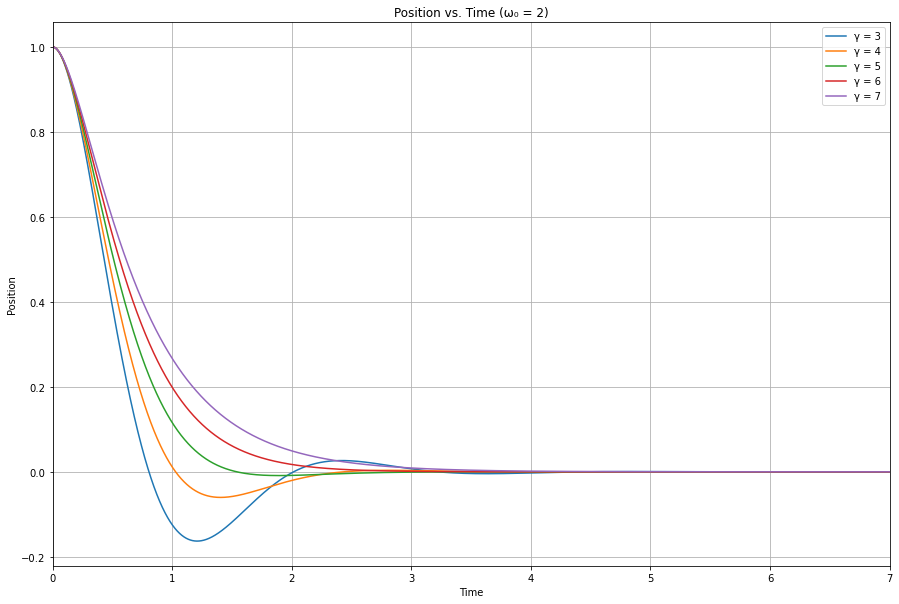

In [23]:
for i in range(0,5):
    plt.plot(dampedw02[i][0], dampedw02[i][1], label='\u03B3 = %.0f' % (i+3))

plt.title('Position vs. Time (\u03C9\u2080 = 2)')
plt.xlabel('Time')
plt.ylabel('Position')
plt.xlim((0,7))
plt.legend();

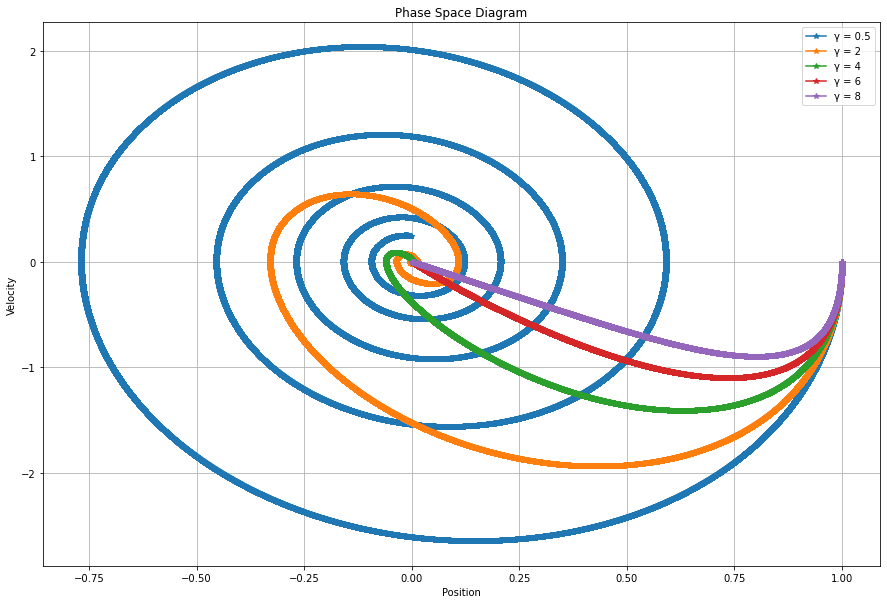

In [24]:
#Plotting Phase Space Diagrams for different values of the damping constant

plt.plot(damped05to8[0][1], damped05to8[0][2], marker='*',label='\u03B3 = 0.5')
for i in [2,4,6,8]:
    plt.plot(damped05to8[i][1], damped05to8[i][2], marker='*', label='\u03B3 = %.0f' % (i))
plt.title('Phase Space Diagram')
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.legend();

### Part C: Motion of a Driven Damped Linear Linear Oscillator ###

In [25]:
def DrivenEulerRichardson(f, dt, wi, xi, vi, g, w0, a0, w, t):
    halfstep = 0.5*dt
    
    xmid = xi + vi*halfstep
    vmid = vi + f(xi, vi, g, w0, w, t, a0)*halfstep
    amid = f(xmid, vmid, g, w0, w, t, a0)
    return vi + amid*dt

In [26]:
def drivenaccel(x, v, g, w0, w, t, a0):
    return -x*w0**2 - g*v + a0*np.cos(w*t)

In [27]:
def DrivenEulerRichardsonSolve(f, dt, w0, x0, v0, g, w, a0, tmax, store = False, plotSteps = False, printSteps = False, printPeriod = False, plotSolution = False):
    wi = w0
    xi = x0
    vi = v0
    
    xsteps, vsteps = [], []
    xsteps.append(xi)
    vsteps.append(vi)
    
    t = 0
    while t < tmax:
        vi = DrivenEulerRichardson(f, dt, wi, xi, vi, g, w0, a0, w, t)
        xi += vi*dt
        
        
        xsteps.append(xi)
        vsteps.append(vi)
        
        t += dt

    if(plotSteps):
        plt.plot(np.linspace(0,tmax, len(xsteps)), xsteps, label='Euler-Richardson Approximation')
        plt.title('Motion of a Driven, Damped, Linear Oscillator')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement')
        plt.axhline(y=0, color='k')
        plt.legend(loc='upper right');
    if(store):
        return np.asarray((np.linspace(0,tmax, len(xsteps)), xsteps, vsteps))
    if(printSteps):
        print(xsteps)
    if(printPeriod):
        print("Period = %.2fs" % (2*np.pi/w))
    if(plotSolution):
        def dU_dt(U, t):
            return [U[1], -g*U[1] - U[0]*w0**2 + a0*np.cos(w*t)]
        U0 = [x0, v0]
        ts = np.linspace(0,tmax, len(xsteps))
        Us = odeint(dU_dt, U0, ts)
        ys = Us[:,0]
        plt.plot(ts,ys, color='red', label='Analytical Solution')
        plt.legend(loc='upper right');

Period = 3.14s


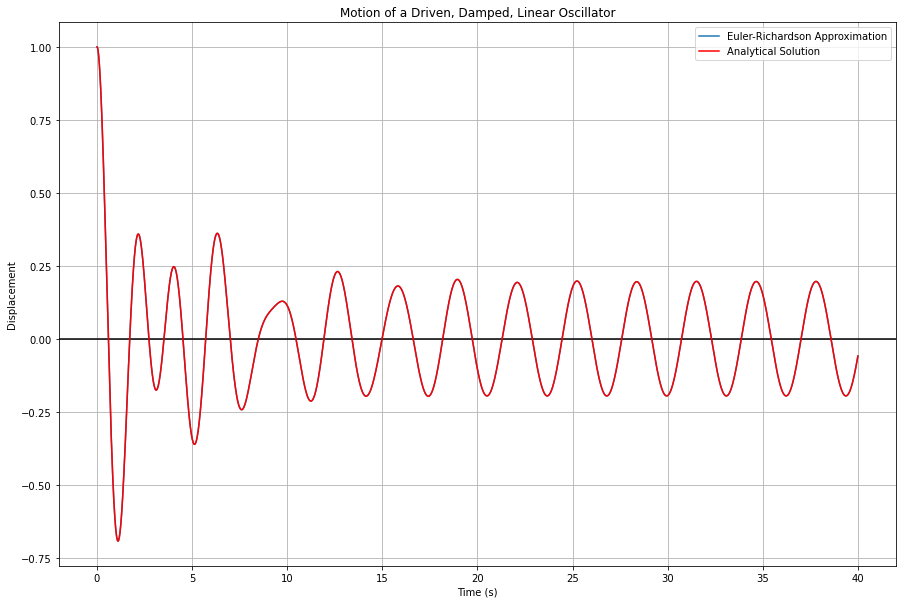

In [28]:
DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 0, 0.5, 2, 1, 40, False, True, False, True, True)

Period = 3.14s


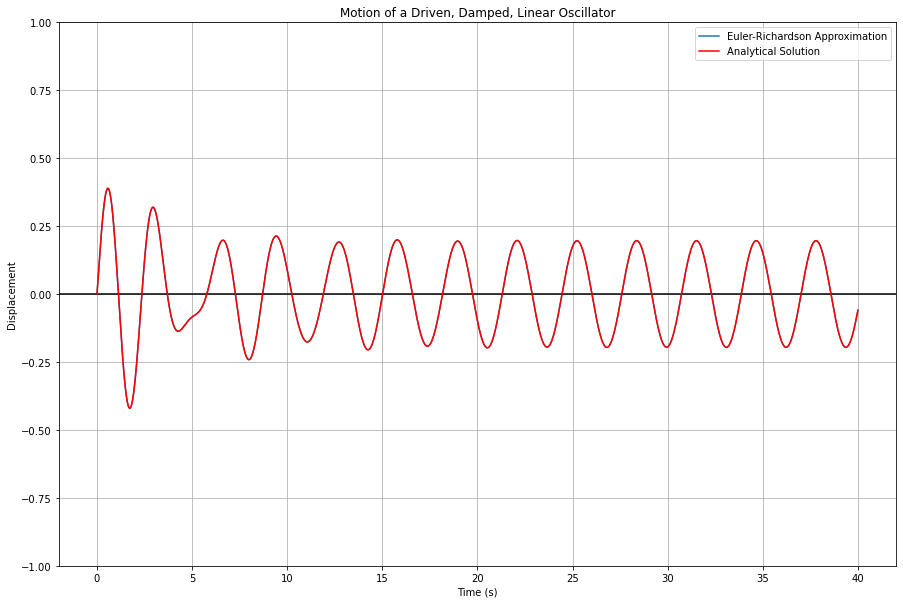

In [29]:
DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0, 1, 0.5, 2, 1, 40, False, True, False, True, True)
plt.ylim((-1,1));

In [30]:
drivenx100 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 0, 0.5, 2, 1, 30, True, False, False, False, False)
drivenx75 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0.75, 0, 0.5, 2, 1, 30, True, False, False, False, False)
drivenx50 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0.5, 0, 0.5, 2, 1, 30, True, False, False, False, False)
drivenx25 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0.25, 0, 0.5, 2, 1, 30, True, False, False, False, False)
drivenv3 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 3, 0.5, 2, 1, 30, True, False, False, False, False)
drivenv2 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 2, 0.5, 2, 1, 30, True, False, False, False, False)
drivenv1 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 1, 0.5, 2, 1, 30, True, False, False, False, False)
drivenv0 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 0, 0.5, 2, 1, 30, True, False, False, False, False)

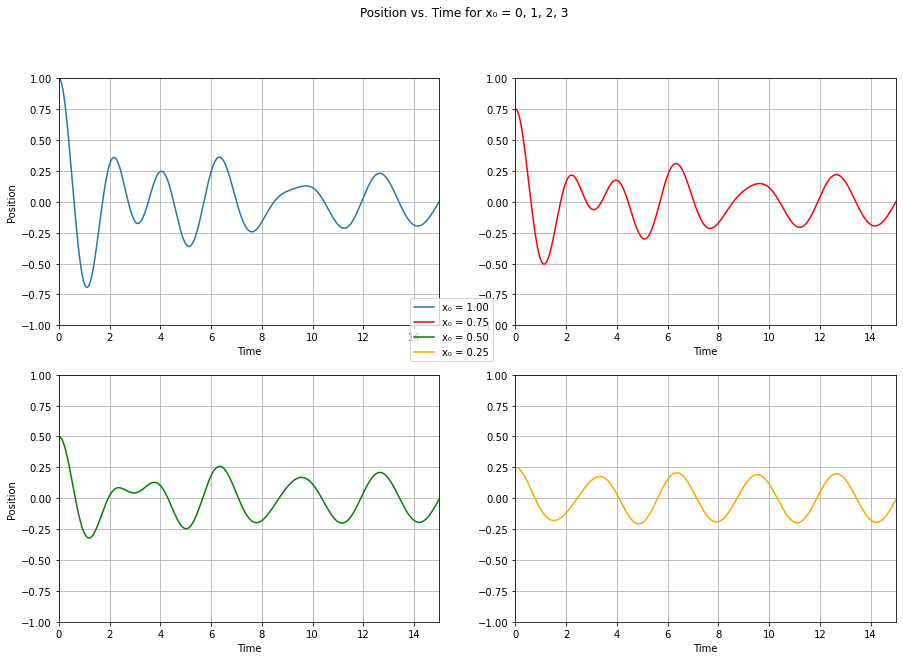

In [31]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(drivenx100[0], drivenx100[1], label='x\u2080 = 1.00')
ax[0,0].set_xlim((0,10))
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Position')
ax[0,1].plot(drivenx75[0], drivenx75[1], color='red', label='x\u2080 = 0.75')
ax[0,1].set_xlim((0,10))
ax[0,1].set_xlabel('Time')
ax[1,0].plot(drivenx50[0], drivenx50[1], color='green',  label='x\u2080 = 0.50')
ax[1,0].set_xlim((0,10))
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Position')
ax[1,1].plot(drivenx25[0], drivenx25[1], color='orange',  label='x\u2080 = 0.25')
ax[1,1].set_xlim((0,10))
ax[1,1].set_xlabel('Time')
plt.figlegend(loc='center')
plt.setp(ax, xlim=(0,15), ylim=(-1,1))
plt.suptitle('Position vs. Time for x\u2080 = 0, 1, 2, 3');

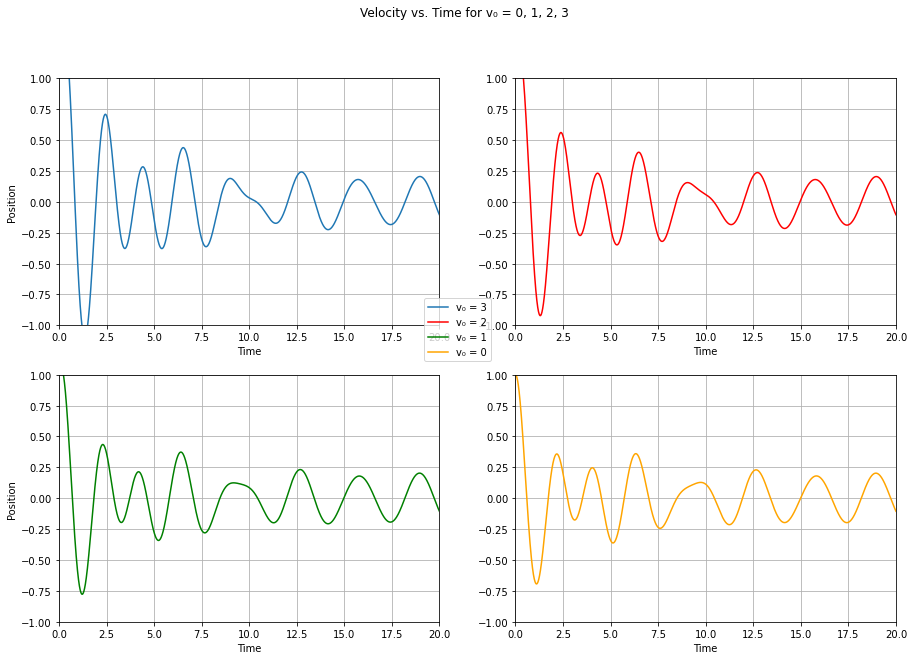

In [32]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
ax[0,0].plot(drivenv3[0], drivenv3[1], label='v\u2080 = 3')
ax[0,0].set_xlim((0,10))
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Position')
ax[0,1].plot(drivenv2[0], drivenv2[1], color='red', label='v\u2080 = 2')
ax[0,1].set_xlim((0,10))
ax[0,1].set_xlabel('Time')
ax[1,0].plot(drivenv1[0], drivenv1[1], color='green',  label='v\u2080 = 1')
ax[1,0].set_xlim((0,10))
ax[1,0].set_xlabel('Time')
ax[1,0].set_ylabel('Position')
ax[1,1].plot(drivenv0[0], drivenv0[1], color='orange',  label='v\u2080 = 0')
ax[1,1].set_xlim((0,10))
ax[1,1].set_xlabel('Time')
plt.figlegend(loc='center')
plt.setp(ax, xlim=(0,20), ylim=(-1,1))
plt.suptitle('Velocity vs. Time for v\u2080 = 0, 1, 2, 3');

Period = 3.14s


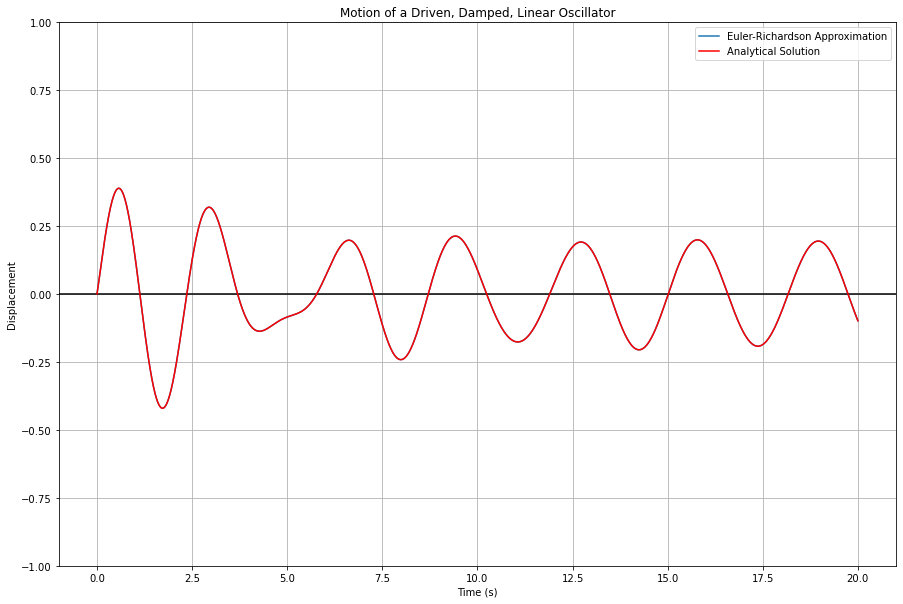

In [73]:
DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0, 1, 0.5, 2, 1, 20, False, True, False, True, True)
plt.ylim((-1,1));

In [34]:
drivenw0 = [DrivenEulerRichardsonSolve(drivenaccel, 0.0001, i, 1, 0, 0.5, 2, 1, 30, True) for i in range(1,5)]
drivenw = [DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 0, 0.5, i, 1, 30, True) for i in range(1,5)]

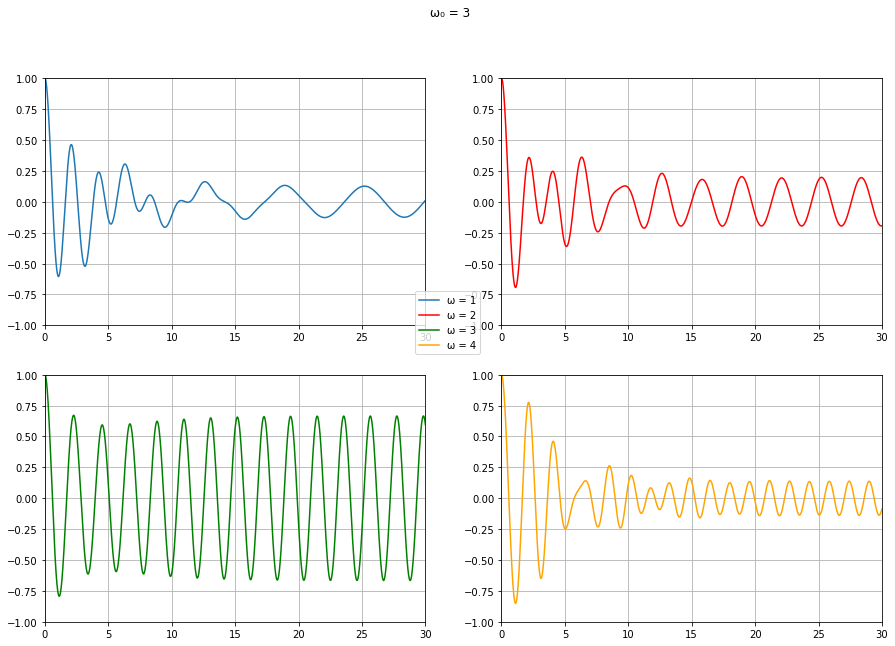

In [35]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].plot(drivenw[0][0], drivenw[0][1], label='\u03C9 = 1')
ax[0,1].plot(drivenw[1][0], drivenw[1][1], label='\u03C9 = 2', color='red')
ax[1,0].plot(drivenw[2][0], drivenw[2][1], label='\u03C9 = 3', color='green')
ax[1,1].plot(drivenw[3][0], drivenw[3][1], label='\u03C9 = 4', color='orange')
plt.figlegend(loc='center')
plt.setp(ax, xlim=(0,30), ylim=(-1,1))
plt.suptitle('\u03C9\u2080 = 3');

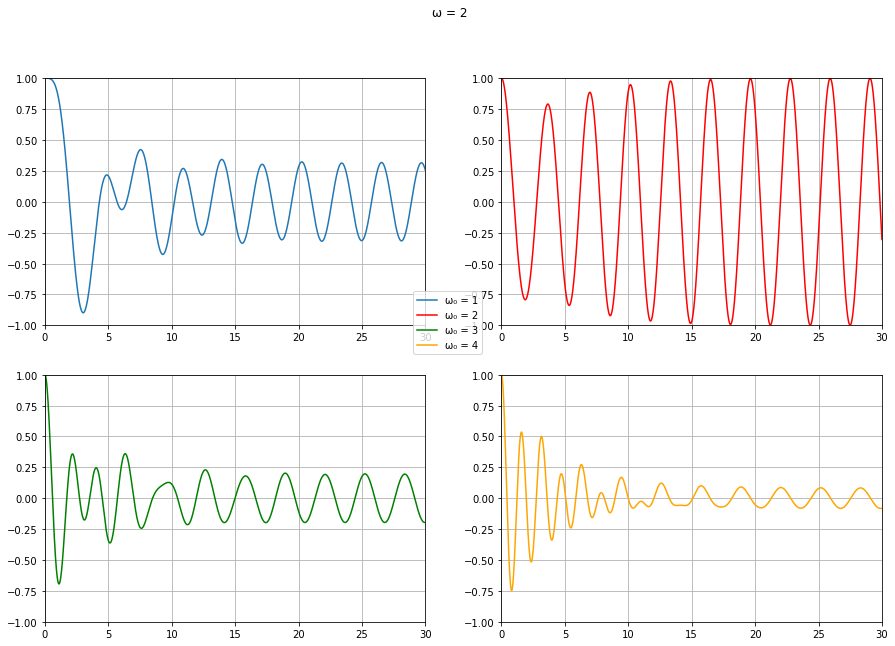

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
ax[0,0].plot(drivenw0[0][0], drivenw0[0][1], label='\u03C9\u2080 = 1')
ax[0,1].plot(drivenw0[1][0], drivenw0[1][1], label='\u03C9\u2080 = 2', color='red')
ax[1,0].plot(drivenw0[2][0], drivenw0[2][1], label='\u03C9\u2080 = 3', color='green')
ax[1,1].plot(drivenw0[3][0], drivenw0[3][1], label='\u03C9\u2080 = 4', color='orange')
plt.figlegend(loc='center')
plt.setp(ax, xlim=(0,30), ylim=(-1,1))
plt.suptitle('\u03C9 = 2');

In [37]:
def amplitude(x, w, w0, g, A0):
    return A0/np.sqrt((g**2 * w**2 + (w0**2 - w**2)**2))

In [38]:
drivenx100 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 1, 0, 0.5, 2, 1, 50, True, False, False, False, False)

In [39]:
A100 = amplitude(drivenx100[1], 2, 3, 0.5, 1)
A100

0.19611613513818404

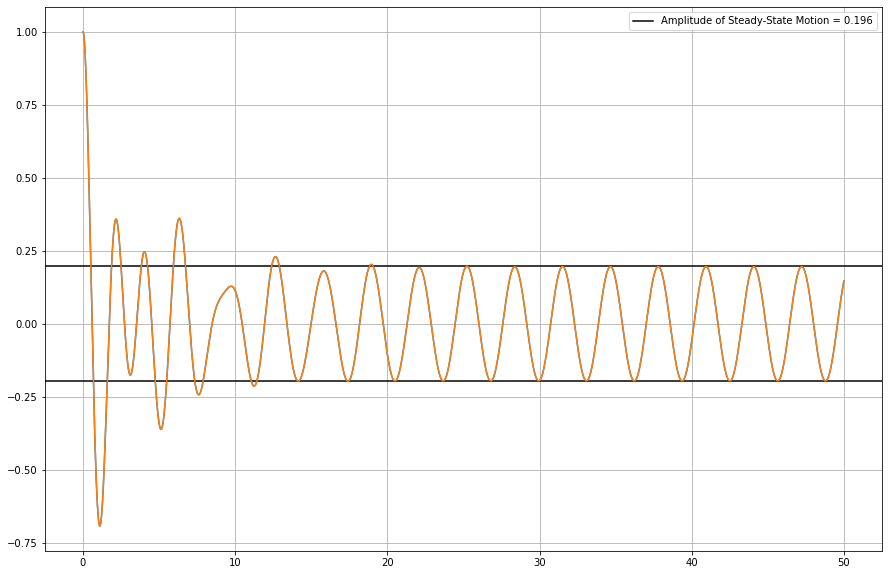

In [40]:
plt.plot(drivenx100[0], drivenx100[1])
plt.axhline(y=A100, color='k', label='Amplitude of Steady-State Motion = %.3f'%(A100))
plt.axhline(y=-A100, color='k')
plt.plot(drivenx100[0], drivenx100[1])
plt.legend();

In [41]:
def AmpPhase(f, dt, w0, x0, v0, g, w, a0, tmax, storeSteps = False, storeAP = False, plotSteps = False, plotSteadyState = False):
    def steadystate(t, w, g, w0, a0):
        p = np.arctan((g*w)/(w**2 - w0**2)) #Phase Difference
        Aw = a0/np.sqrt((g**2 * w**2 + (w0**2 - w**2)**2)) #Amplitude wrt. driving frequency
        out = Aw*np.cos(w*t+p)
        return out
    wi = w0
    xi = x0
    vi = v0
    
    xsteps, vsteps = [], []
    xsteps.append(xi)
    vsteps.append(vi)
    
    t = 0
    while t < tmax:
        vi = DrivenEulerRichardson(f, dt, wi, xi, vi, g, w0, a0, w, t)
        xi += vi*dt
        
        
        xsteps.append(xi)
        vsteps.append(vi)
        
        t += dt

    if(plotSteps):
        plt.plot(np.linspace(0,tmax, len(xsteps)), xsteps, label='Euler-Richardson Approximation')
        plt.title('Motion of a Driven, Damped, Linear Oscillator')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement')
        plt.axhline(y=0, color='k')
        plt.legend(loc='upper right');
    if(plotSteadyState):
        s = steadystate(np.linspace(0,tmax, len(xsteps)), w, g, w0, a0)
        plt.plot(np.linspace(0,tmax, len(xsteps)), s, label='Amplitude of Steady-State Motion')
        plt.legend();
    if(storeSteps):
        s = steadystate(np.linspace(0,tmax, len(xsteps)), w, g, w0, a0)
        return s
    if(storeAP):
        return np.asarray((a0/np.sqrt((g**2 * w**2 + (w0**2 - w**2)**2)), np.arctan((g*w)/(w**2 - w0**2))))

In [57]:
frequencies = [0,1,2.2,2.4,2.6,2.8,2.99999999,3.01,3.2,3.4]
ampphase05 = [AmpPhase(drivenaccel, 0.0001, 3, 0, 0, 0.5, i, 1, 10, False, True, False, False) for i in frequencies]
ampphase3 = [AmpPhase(drivenaccel, 0.0001, 3, 0, 0, 3, i, 1, 10, False, True, False, False) for i in frequencies]

In [58]:
newamp05 = [ampphase05[i][0] for i in range(0,10)]
newphase05 = [ampphase05[i][1] for i in range(0,10)]
newamp3 = [ampphase3[i][0] for i in range(0,10)]
newphase3 = [ampphase3[i][1] for i in range(0,10)]

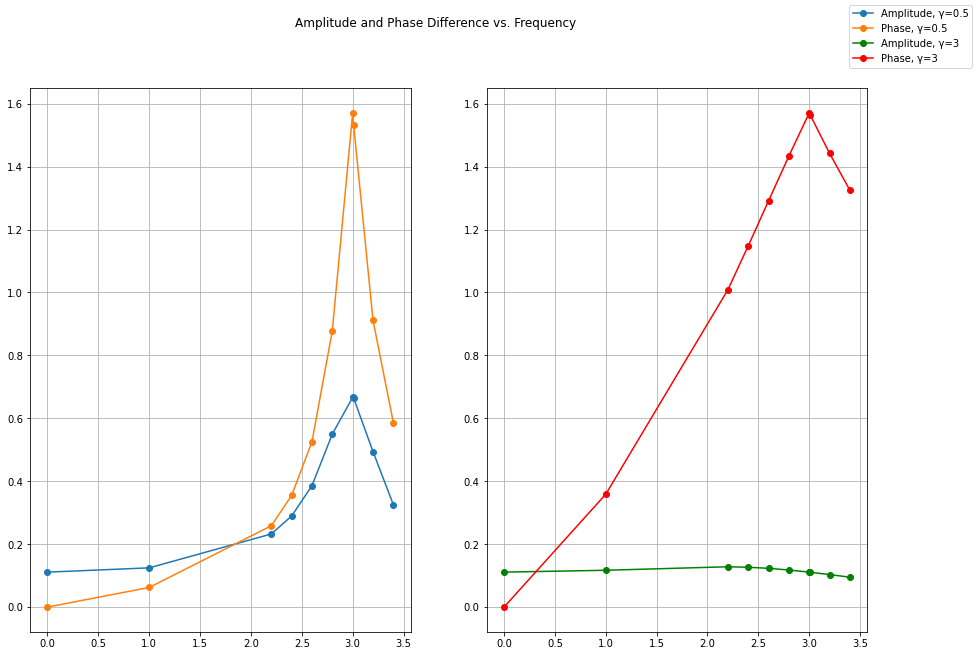

In [61]:
fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].plot(frequencies, newamp05, marker='o', label='Amplitude, \u03B3=0.5')
ax[0].plot(frequencies, np.abs(newphase05), marker='o', label='Phase, \u03B3=0.5')
ax[1].plot(frequencies, newamp3, marker='o', label='Amplitude, \u03B3=3', color='green')
ax[1].plot(frequencies, np.abs(newphase3), marker='o', label='Phase, \u03B3=3', color='red')
plt.figlegend()
plt.suptitle('Amplitude and Phase Difference vs. Frequency');

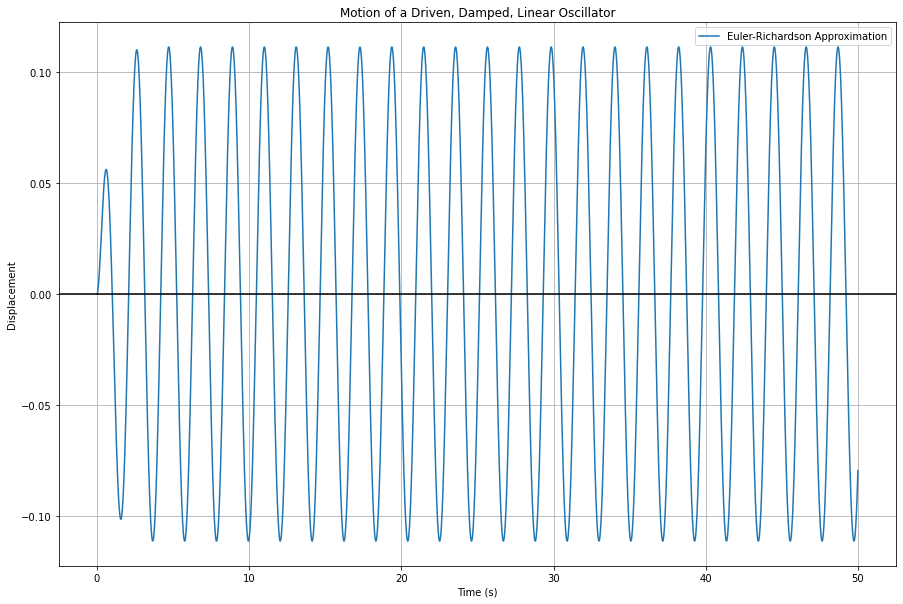

In [71]:
drivenx100 = DrivenEulerRichardsonSolve(drivenaccel, 0.0001, 3, 0, 0, 3, 3, 1, 50, False, True)

In [55]:
print('Maximum Amplitude is %.2f at \u03C9 = %.2f' %(newamp05[-4], frequencies[-4]))

Maximum Amplitude is 0.67 at ω = 2.99


In [56]:
DampEulerRichardsonSolve(dampaccel, 0.0001, 3, 1, 0, 0.5, 10, False, False, False, False, False, True)

Frequency = 2.99s
